In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('uaScoresDataFrame.csv')
df

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [4]:
#check for any incompletes or duplicates
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [5]:
df
# there are no incompletes or dups

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.3730,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.8860,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,Canada,North America,7.5525,5.882,3.7965,0.000,1.4755,5.10450,...,6.0155,7.755667,5.3440,5.67475,5.8405,7.2745,4.9025,4.6880,6.6590,4.2430
262,262,Wroclaw,Poland,Europe,8.4520,8.434,3.5860,2.386,2.2445,4.95475,...,8.1655,6.781333,4.1615,4.96475,4.7615,5.0970,5.7615,4.7495,3.9045,4.0850
263,263,Yerevan,Armenia,Asia,9.6945,9.431,3.9265,0.000,1.7870,5.64925,...,8.8730,5.102000,0.0000,4.43950,3.4580,8.0550,3.9000,4.7370,7.3465,7.7765
264,264,Zagreb,Croatia,Europe,8.9100,7.194,4.4530,1.775,2.0280,4.83000,...,8.6575,7.266000,3.2110,7.33150,2.2365,7.9935,5.0335,4.9945,7.9545,4.8090


In [6]:
# one hot encoding: categorizing the country and continent into numerical values
# ADD CITY NAME IF YOU WAnt, IDK IF YOU WANT TO USE IT
# You can also drop if not using.
df2 = pd.get_dummies(data=df, columns=['UA_Country','UA_Continent'])
df2.head()

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df.dtypes

Unnamed: 0                 int64
UA_Name                   object
UA_Country                object
UA_Continent              object
Housing                  float64
Cost of Living           float64
Startups                 float64
Venture Capital          float64
Travel Connectivity      float64
Commute                  float64
Business Freedom         float64
Safety                   float64
Healthcare               float64
Education                float64
Environmental Quality    float64
Economy                  float64
Taxation                 float64
Internet Access          float64
Leisure & Culture        float64
Tolerance                float64
Outdoors                 float64
dtype: object

In [8]:
cols_to_scale = ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity','Commute', 'Business Freedom', 'Safety','Healthcare','Education','Environmental Quality','Economy','Taxation','Internet Access','Leisure & Culture', 'Tolerance','Outdoors']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
                 

In [9]:
df2

,Unnamed: 0,UA_Name,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,...,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Country_Andorra,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,0,Aarhus,0.61315,0.4015,0.28270,0.2512,0.319579,0.938062,0.994000,0.955698,...,0,0,0,0,0,0,1,0,0,0
1,1,Adelaide,0.63095,0.4692,0.31365,0.2640,0.134368,0.793082,0.939967,0.760411,...,0,0,0,0,0,0,0,0,1,0
2,2,Albuquerque,0.72620,0.6059,0.37720,0.1493,0.100579,0.751393,0.867100,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,3,Almaty,0.92820,0.9333,0.24585,0.0000,0.430737,0.872594,0.556800,0.689135,...,0,0,0,0,0,1,0,0,0,0
4,4,Amsterdam,0.30530,0.3824,0.79715,0.6107,0.823632,0.909341,0.883667,0.827124,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Winnipeg,0.75525,0.5882,0.37965,0.0000,0.102684,0.758639,0.896600,0.539710,...,0,0,0,0,0,0,0,1,0,0
262,262,Wroclaw,0.84520,0.8434,0.35860,0.2386,0.183632,0.736383,0.570433,0.788078,...,0,0,0,0,0,0,1,0,0,0
263,263,Yerevan,0.96945,0.9431,0.39265,0.0000,0.135474,0.839600,0.650100,0.869809,...,0,0,0,0,0,1,0,0,0,0
264,264,Zagreb,0.89100,0.7194,0.44530,0.1775,0.160842,0.717842,0.572033,0.844914,...,0,0,0,0,0,0,1,0,0,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

We plot the correlation matrix for the different columns, we can get an idea of which columns are correlated from this figure

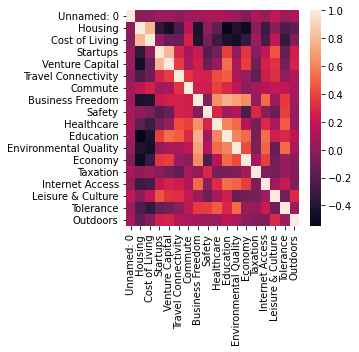

In [27]:
df3 = df2[df2.columns[:19]]


fig, ax = plt.subplots(figsize=(5,5))  

hm = sns.heatmap(df3.corr());
fig = hm.get_figure()
ax.figure.tight_layout()
fig.savefig('heatmap.jpg')

We then remove duplicate values and columns that are correlated with themselves and save it in a file

In [43]:
c = df3.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
filtered_list = so[so>=0][::-2]
non_ones = filtered_list[filtered_list!=1.000]
non_ones.to_csv("correlation_list_reverse.csv")



In [36]:
print(so[so!=1.000][20:40:-2])

Economy          Cost of Living        -0.327045
Internet Access  Housing               -0.301744
Healthcare       Cost of Living        -0.291351
Cost of Living   Internet Access       -0.259348
Economy          Safety                -0.241724
Housing          Travel Connectivity   -0.233817
Tolerance        Housing               -0.231671
Safety           Startups              -0.209409
Housing          Healthcare            -0.166979
                 Outdoors              -0.165504
dtype: float64


We create 4 categories using the correlations we have derived

In [72]:
import pandas as pd
import scipy.cluster.hierarchy as spc

df5 = df4.drop(columns=["Unnamed: 0"])
corr = df5.corr().values
print(df5.columns)
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
dict = {}
for i in range(len(idx)):
    if dict.get(idx[i]):
        dict[idx[i]].append(df5.columns[i])
    else:
        dict[idx[i]]= [df5.columns[i]]
dict

Index(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'],
      dtype='object')


{1: ['Housing', 'Cost of Living'],
 4: ['Startups',
  'Venture Capital',
  'Travel Connectivity',
  'Commute',
  'Leisure & Culture',
  'Outdoors'],
 3: ['Business Freedom',
  'Healthcare',
  'Education',
  'Environmental Quality',
  'Economy',
  'Internet Access',
  'Tolerance'],
 2: ['Safety', 'Taxation']}

We create a representatuve value for each category from its columns

In [ ]:
df4['category1']= df4['Housing']*df4['Cost of Living']
df4['category2']= df4['Travel Connectivity']*df4['Commute']*df4['Startups']*df4['Venture Capital']*df4['Leisure & Culture']*df4['Outdoors']
df4['category3']= df4['Business Freedom']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']*df4['Economy']*df4['Internet Access']*df4['Tolerance']
df4['category4']= df4['Safety']*df4['Taxation']

In [94]:
df4['Vacation Lovers']= df4['Startups']*df4['Venture Capital']*df4['Business Freedom']*df4['Taxation']*df4['Economy']
df4['Entrepreneur & Business person']= df4['Travel Connectivity']*df4['Commute']*df4['Leisure & Culture']*df4['Internet Access']
df4['Stability Seeker']= df4['Housing']*df4['Cost of Living']*df4['Tolerance']*df4['Outdoors']
df4['Family']= df4['Safety']*df4['Healthcare']*df4['Education']*df4['Environmental Quality']

We then normalized this combined categorical data

In [100]:

df6 = df4[['category1','category2','category3','category4']]
df7 = df4[['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']]
cols_to_scale =['category1','category2','category3','category4']
scaler = MinMaxScaler()
df6[cols_to_scale] = scaler.fit_transform(df6[cols_to_scale])
scaler = MinMaxScaler()
cols_to_scale =['Vacation Lovers','Entrepreneur & Business person','Stability Seeker','Family']
df7[cols_to_scale] = scaler.fit_transform(df7[cols_to_scale])





/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,0.028931,0.103923,0.182111,0.656049
1,0.035464,0.022736,0.233708,0.504018
2,0.022465,0.023967,0.182452,0.000000
3,0.000000,0.030715,0.543812,0.045265
4,0.177814,0.345436,0.095555,0.590787
...,...,...,...,...
261,0.000000,0.021025,0.213622,0.231677
262,0.019616,0.045115,0.156158,0.195357
263,0.000000,0.023052,0.966565,0.000000
264,0.013914,0.034315,0.442353,0.276525


In [102]:
df7

,Vacation Lovers,Entrepreneur & Business person,Stability Seeker,Family
0,0.028931,0.103923,0.182111,0.656049
1,0.035464,0.022736,0.233708,0.504018
2,0.022465,0.023967,0.182452,0.000000
3,0.000000,0.030715,0.543812,0.045265
4,0.177814,0.345436,0.095555,0.590787
...,...,...,...,...
261,0.000000,0.021025,0.213622,0.231677
262,0.019616,0.045115,0.156158,0.195357
263,0.000000,0.023052,0.966565,0.000000
264,0.013914,0.034315,0.442353,0.276525


In [101]:
df6

,category1,category2,category3,category4
0,0.246180,0.007213,0.761387,0.463056
1,0.296042,0.005627,0.301294,0.329761
2,0.440005,0.001838,0.193978,0.000000
3,0.866289,0.000000,0.006935,0.586373
4,0.116747,0.455483,0.290757,0.390846
...,...,...,...,...
261,0.444238,0.000000,0.171281,0.387815
262,0.712842,0.005769,0.029773,0.384265
263,0.914288,0.000000,0.000000,0.697020
264,0.640985,0.005752,0.041108,0.671559
